In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [0]:
import torch.nn.functional as F

In [0]:
import torch.nn as nn

In [0]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


Here we further simplify the code by using optim library and thus making the fit function very compact and concise

The PyTorch module torch.optim provides many optimizers.

An optimizer has an internal state to keep quantities such as moving averages, and operates on an iterator over Parameters.

• Values specific to the optimizer can be specified to its constructor, and

• its step method updates the internal state according to the grad attributes of the Parameters, and updates the latter according to the internal state.

https://fleuret.org/ee559/ee559-slides-5-3-optim.pdf



<h3> Data Generation </h3>


In [5]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)


(1000, 2) (1000,)


In [6]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape, labels.shape)

(750, 2) (250, 2) (1000,)


In [0]:
X_train, Y_train, X_val, Y_val = map(torch.tensor, (X_train, Y_train, X_val, Y_val))


In [0]:
#https://stackoverflow.com/questions/56741087/how-to-fix-runtimeerror-expected-object-of-scalar-type-float-but-got-scalar-typ/56741419
X_train = X_train.float()
Y_train = Y_train.long()


<h3> Neural Network Class </h3>

In [0]:
class TwoLayerNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2,2),
        nn.Sigmoid(),
        nn.Linear(2,4),
        nn.Softmax()
    )
  
  def forward(self,X):
    return self.net(X)

<h3> Using Optim </h3>

In [0]:
from torch import optim

In [0]:
def accuracy(y_pred,y):
  pred = torch.argmax(y_pred, dim=1)
  return (pred == y).float().mean()


In [0]:
def fit_v1(epochs = 1000, learning_rate = 1):
  loss_arr = []
  acc_arr = []
  opt = optim.SGD(fn.parameters(), lr=learning_rate)
  
  for epoch in range(epochs):
    Y_pred = fn(X_train)
    loss = F.cross_entropy(Y_pred, Y_train)
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(Y_pred, Y_train))

    loss.backward()
    opt.step() # Update all the parameters
    opt.zero_grad() # Make all gradients zero
        
  plt.plot(loss_arr, 'r-')
  plt.plot(acc_arr, 'b-')
  plt.show()      
  print('Loss before training', loss_arr[0])
  print('Loss after training', loss_arr[-1])

In [0]:
fn = TwoLayerNetwork()

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


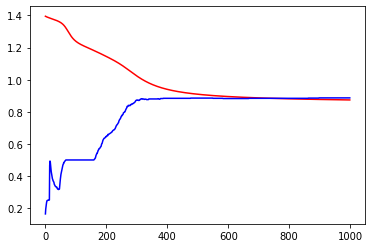

Loss before training 1.395160436630249
Loss after training 0.8738410472869873


In [14]:
fit_v1()

In [0]:
def fit_v2(x,y,model,opt, loss_fn,epochs=5000):
  for epoch in range(epochs):
    loss = loss_fn(model(x),y)

    loss.backward()
    opt.step()
    opt.zero_grad()
    
  return loss.item()


In [16]:
fn = TwoLayerNetwork()
loss_fn = F.cross_entropy
opt = optim.SGD(fn.parameters(), lr=1)
fit_v2(X_train, Y_train, fn, opt, loss_fn)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0.8406463861465454

Instead of Stochastic gradient descent, lets try Adam

In [17]:
opt = optim.Adam(fn.parameters(), lr = 1)
fit_v2(X_train, Y_train, fn, opt, loss_fn)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0.8239385485649109